## Context
Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc.

He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.

Bob wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem.

In this problem you do not have to predict actual price but a price range indicating how high the price is

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from scikitplot.metrics import plot_roc
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression


### Exploratory data analysis


In [2]:
train_pd = pd.read_csv('train.csv')
train_pd.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


### Explanation of the features
**battery_power:** Total energy a battery can store in one time measured in mAh<br>
**blue:** Has bluetooth or not<br>
**clock_speed**: speed at which microprocessor executes instructions<br>
**dual_sim**: Has dual sim support or not<br>
**fc:** Front Camera mega pixels<br>
**four_g:** Has 4G or not<br>
**int_memory:** Internal Memory in Gigabytes<br>
**m_dep:** Mobile Depth in cm<br>
**mobile_wt:** Weight of mobile phone<br>
**n_cores:** Number of cores of processor<br>
**pc:** Primary Camera mega pixels<br>
**px_height:** Pixel Resolution Height<br>
**px_width:** Pixel Resolution Width<br>
**ram:** Random Access Memory in Mega Bytes<br>
**sc_h:** Screen Height of mobile in cm<br>
**sc_w:** Screen Width of mobile in cm<br>
**talk_time:** longest time that a single battery charge will last when you are<br>
**three_g:** Has 3G or not<br>
**touch_screen:** Has touch screen or not<br>
**wifi:** Has wifi or not<br>
**price_range:** Target variable with possible values of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).<br>

In [3]:
train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [4]:
train_pd.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


<AxesSubplot: >

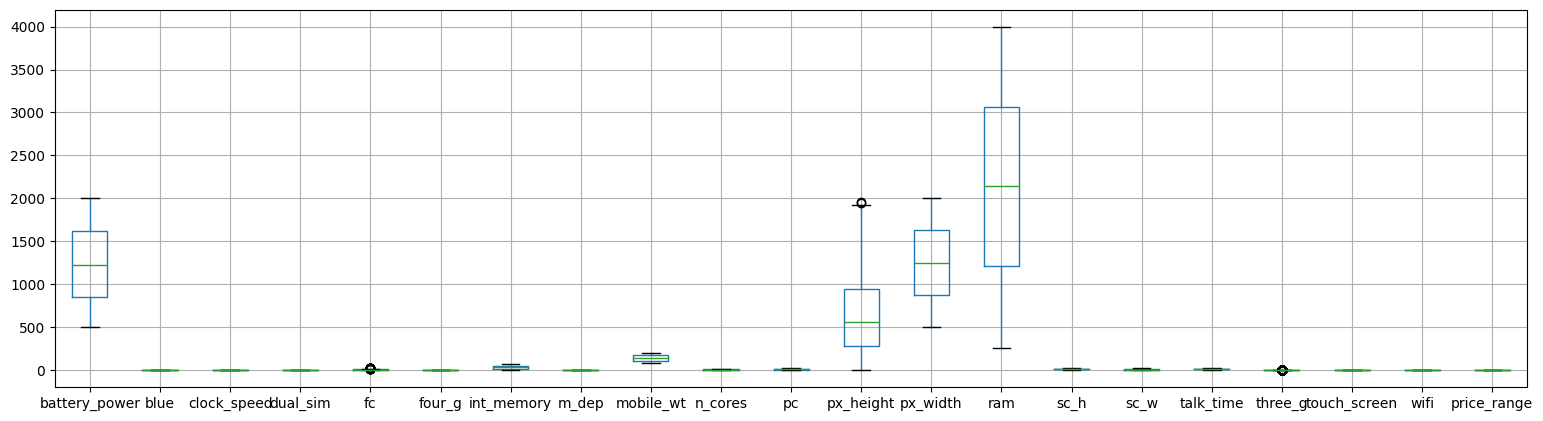

In [40]:
train_pd.boxplot(figsize=(19,5))

Text(0.5, 1.0, 'Correlation between features')

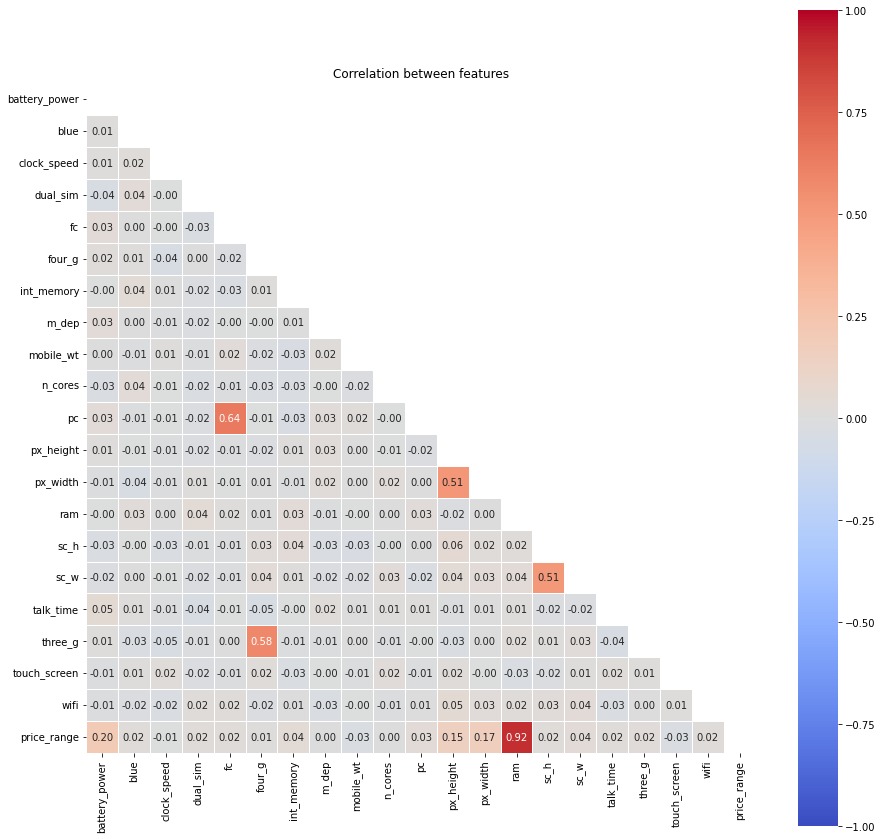

In [6]:
%matplotlib inline
corr = train_pd.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(15, 15))
sns.heatmap(corr, vmin = -1, vmax=1, mask=mask, cmap="coolwarm", square=True, annot=True, fmt=".2f", linewidths=.5)
plt.title('Correlation between features')

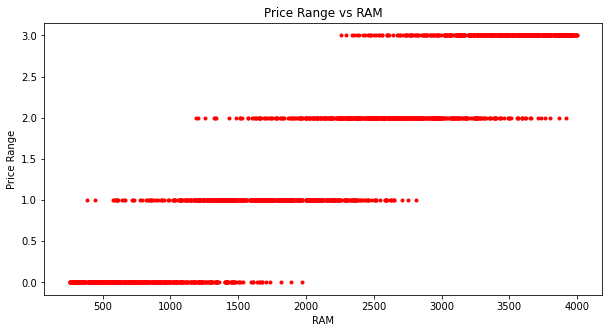

In [7]:
plt.figure(figsize=(10, 5))
plt.rcParams['figure.dpi'] = 100
plt.scatter(train_pd['ram'], train_pd['price_range'], c='red', marker='.')
plt.title('Price Range vs RAM')
plt.xlabel('RAM')
plt.ylabel('Price Range')
plt.show()

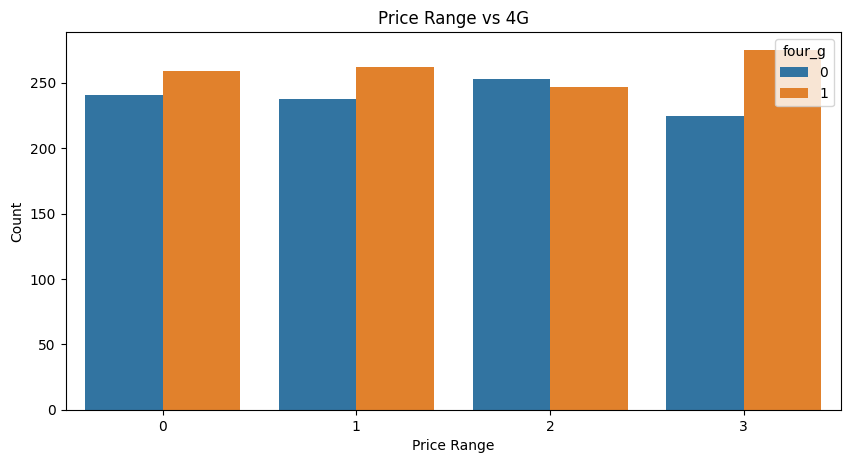

In [8]:

train_pd.groupby('price_range')['four_g'].value_counts()

plt.figure(figsize=(10, 5))
plt.rcParams['figure.dpi'] = 100
sns.countplot(x='price_range', hue='four_g', data=train_pd)
plt.title('Price Range vs 4G')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.show()

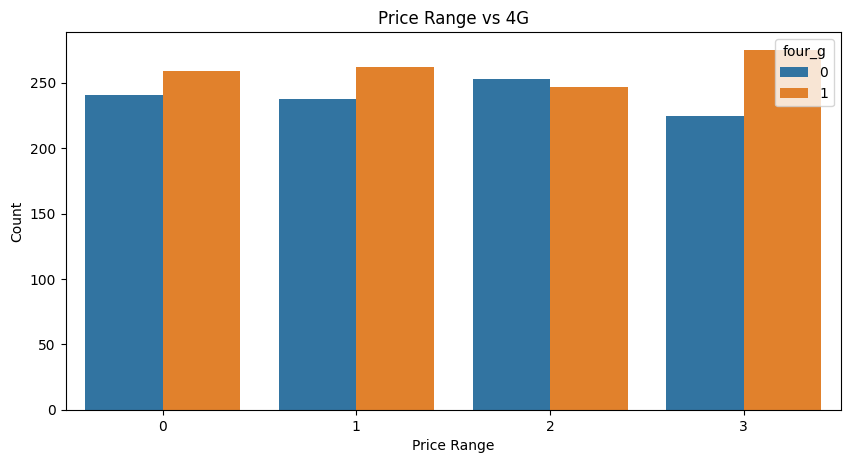

In [9]:

train_pd.groupby('price_range')['three_g'].value_counts()

plt.figure(figsize=(10, 5))
plt.rcParams['figure.dpi'] = 100
sns.countplot(x='price_range', hue='four_g', data=train_pd)
plt.title('Price Range vs 4G')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.show()

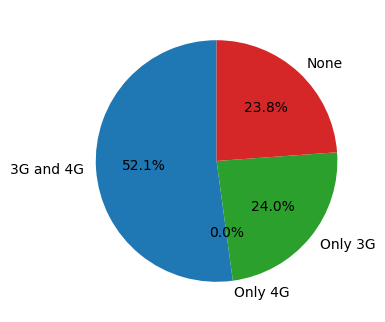

In [10]:
labels = '3G and 4G', 'Only 4G', 'Only 3G', 'None'
with_3g_4g = train_pd[(train_pd['three_g'] == 1) & (train_pd['four_g'] == 1)].shape[0]
only_4g = train_pd[(train_pd['three_g'] == 0) & (train_pd['four_g'] == 1)].shape[0]
only_3g = train_pd[(train_pd['three_g'] == 1) & (train_pd['four_g'] == 0)].shape[0]
none = train_pd[(train_pd['three_g'] == 0) & (train_pd['four_g'] == 0)].shape[0]
sizes = [with_3g_4g, only_4g, only_3g, none]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%.1f%%',  startangle=90)
fig1.set_facecolor('white')

plt.show()


Amount of phones in 3rd price range *(Very high cost)* that don't have 3G neither 4G

In [11]:
print(train_pd[(train_pd['three_g'] == 0) & (train_pd['four_g'] == 0) & (train_pd['price_range'] == 3)].shape[0])

115


### Data preprocessing

In [12]:
X_train = train_pd.drop('price_range', axis=1)
Y_train = train_pd['price_range']

X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.3, random_state=42)


In [13]:
sc = StandardScaler()
X_train_not_scaled = X_train.copy()
X_test_not_scaled = X_test.copy()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [14]:
final_accuracies_train = {}
final_accuracies_test = {}

### SVM


In [15]:
svm = SVC()
svm.fit(X_train, Y_train)

print('Accuracy of SVM on training set: ', svm.score(X_train, Y_train))
print('Accuracy of SVM on test set: ', svm.score(X_test, Y_test))

Accuracy of SVM on training set:  0.9878571428571429
Accuracy of SVM on test set:  0.87


#### Feature selection


In [16]:
accuracies = []
for i in range(1, 21):
    selector = SelectKBest(f_classif, k=i)
    X_train_new = selector.fit_transform(X_train, Y_train)
    X_test_new = selector.transform(X_test)
    svm.fit(X_train_new, Y_train)
    accuracies.append(svm.score(X_test_new, Y_test))

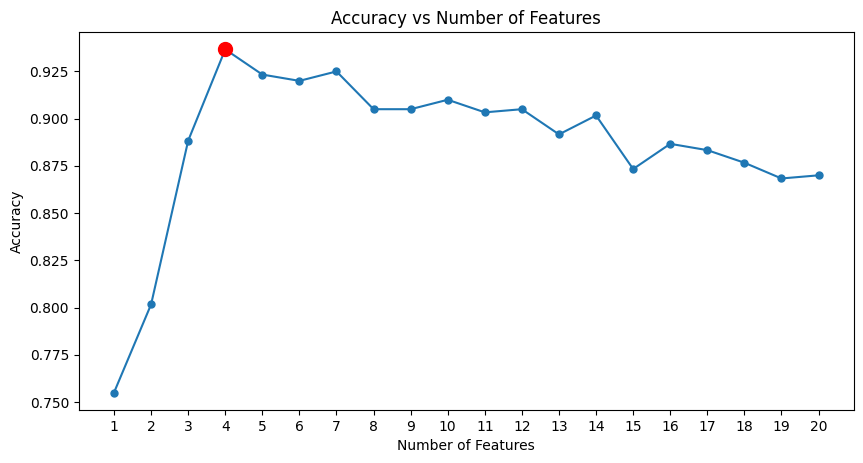

In [17]:
plt.figure(figsize=(10, 5))
plt.rcParams['figure.dpi'] = 100
plt.plot(range(1, 21), accuracies, marker='o', markersize=5)
plt.xticks(range(1, 21))
plt.plot(accuracies.index(max(accuracies)) + 1, max(accuracies), marker='o', markersize=10, color='red')
plt.title('Accuracy vs Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.show()

In [18]:
k_max = accuracies.index(max(accuracies)) + 1

selector = SelectKBest(f_classif, k=k_max)
X_train_new = selector.fit_transform(X_train, Y_train)
X_test_new = selector.transform(X_test)
names_features = train_pd.drop('price_range', axis=1).columns.values[selector.get_support()]
print('Features selected: ', names_features)

svm = SVC()
svm.fit(X_train_new, Y_train)
print('Accuracy of SVM on training set: ', svm.score(X_train_new, Y_train))
print('Accuracy of SVM on test set: ', svm.score(X_test_new, Y_test))

Features selected:  ['battery_power' 'px_height' 'px_width' 'ram']
Accuracy of SVM on training set:  0.9592857142857143
Accuracy of SVM on test set:  0.9366666666666666


In [19]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}
grid = GridSearchCV(SVC(), param_grid, refit=True)
grid.fit(X_train_new, Y_train)

print(grid.best_estimator_)

print("Accuracy on training set: ", grid.score(X_train_new, Y_train))
print("Accuracy on test set: ", grid.score(X_test_new, Y_test))

final_accuracies_train['SVM'] = grid.score(X_train_new, Y_train)
final_accuracies_test['SVM'] = grid.score(X_test_new, Y_test)

SVC(C=100, gamma=0.01)
Accuracy on training set:  0.9614285714285714
Accuracy on test set:  0.9566666666666667


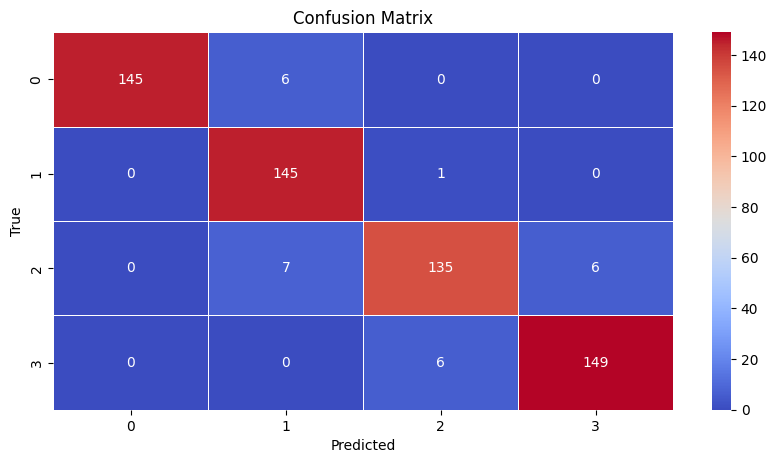

In [20]:
Y_pred = grid.predict(X_test_new)
cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(10, 5))
plt.rcParams['figure.dpi'] = 100
sns.heatmap(cm, annot=True, fmt='d', cmap="coolwarm", linewidths=.5)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#### Logistic Regression

In [21]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)

print("Accuracy on training set: ", logreg.score(X_train, Y_train))
print("Accuracy on test set ", logreg.score(X_test, Y_test))

Accuracy on training set:  0.9764285714285714
Accuracy on test set  0.9583333333333334


In [22]:
param_grid = dict(C=np.arange(5, 50, step=2.5)) 
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
search = GridSearchCV(estimator = logreg, param_grid=param_grid, n_jobs=-1, cv=cv, verbose=True)
result_1 = search.fit(X_train, Y_train)
print(result_1.best_params_, result_1.best_score_)

logreg = LogisticRegression(max_iter=1000, C=result_1.best_params_['C'])
logreg.fit(X_train, Y_train)

y_pred = logreg.predict(X_test)

print('Accuracy on Training data: ',logreg.score(X_train, Y_train))
print('Accuracy on Testing data: ',logreg.score(X_test , Y_test))

final_accuracies_train['Logistic Regression'] = logreg.score(X_train, Y_train)
final_accuracies_test['Logistic Regression'] = logreg.score(X_test, Y_test)

Fitting 30 folds for each of 18 candidates, totalling 540 fits
{'C': 25.0} 0.9645238095238097
Accuracy on Training data:  0.9857142857142858
Accuracy on Testing data:  0.9616666666666667


<AxesSubplot: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

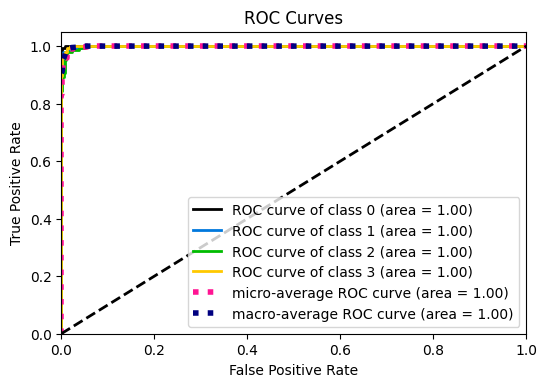

In [23]:
y_proba = logreg.predict_proba(X_test)

plot_roc(Y_test, y_proba)

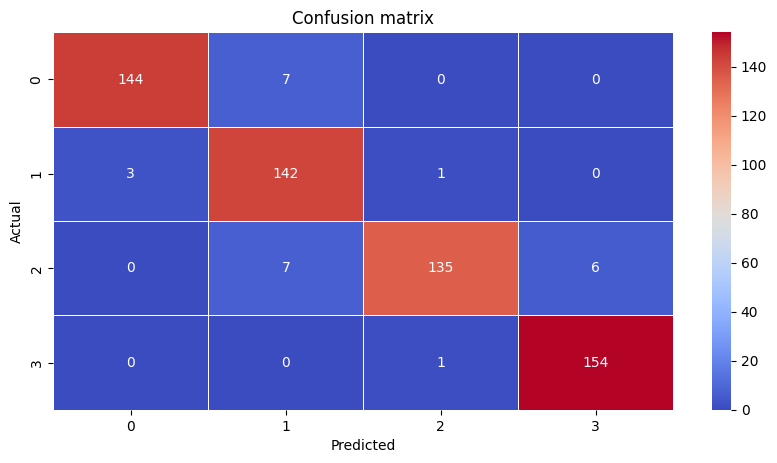

In [24]:
conf = confusion_matrix(Y_test, Y_pred)

plt.figure(figsize=(10, 5))
plt.rcParams['figure.dpi'] = 100
sns.heatmap(conf, annot=True, fmt='d', cmap="coolwarm", linewidths=.5)
plt.title('Confusion matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### Decision Tree

In [25]:
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)

print('Accuracy of Decision Tree on training set: ', dt.score(X_train, Y_train))
print('Accuracy of Decision Tree on test set: ', dt.score(X_test, Y_test))


Accuracy of Decision Tree on training set:  1.0
Accuracy of Decision Tree on test set:  0.8166666666666667


In [26]:
param_grid = {'max_depth': np.arange(1, 20)}
grid = GridSearchCV(DecisionTreeClassifier(), param_grid, refit=True)
grid.fit(X_train, Y_train)

print(grid.best_estimator_)
print("Accuracy on training set: ", grid.score(X_train, Y_train))
print("Accuracy on test set: ", grid.score(X_test, Y_test))

DecisionTreeClassifier(max_depth=10)
Accuracy on training set:  0.9942857142857143
Accuracy on test set:  0.805


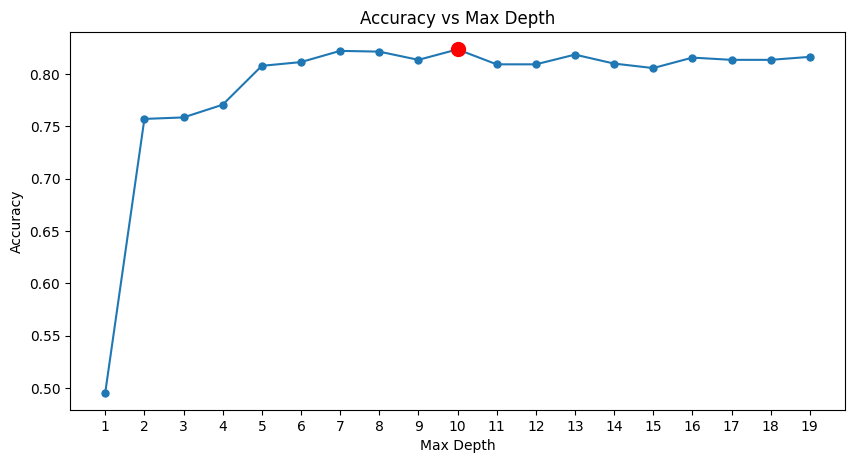

In [27]:
plt.figure(figsize=(10, 5))
plt.rcParams['figure.dpi'] = 100
plt.plot(param_grid['max_depth'], grid.cv_results_['mean_test_score'], marker='o', markersize=5)
plt.xticks(param_grid['max_depth'])
plt.plot(grid.best_params_['max_depth'], grid.best_score_, marker='o', markersize=10, color='red')
plt.title('Accuracy vs Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.show()

In [28]:
dt = DecisionTreeClassifier(max_depth=grid.best_estimator_.max_depth)
dt.fit(X_train, Y_train)

print('Accuracy of Decision Tree on training set: ', dt.score(X_train, Y_train))
print('Accuracy of Decision Tree on test set: ', dt.score(X_test, Y_test))

final_accuracies_train['Decision Tree'] = grid.score(X_train, Y_train)
final_accuracies_test['Decision Tree'] = grid.score(X_test, Y_test)

Accuracy of Decision Tree on training set:  0.9942857142857143
Accuracy of Decision Tree on test set:  0.8083333333333333


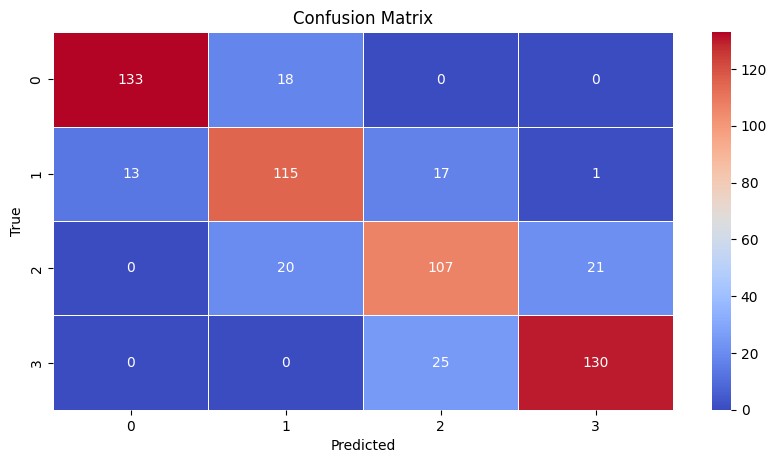

In [29]:
conf = confusion_matrix(Y_test, dt.predict(X_test))
plt.figure(figsize=(10, 5))
plt.rcParams['figure.dpi'] = 100
sns.heatmap(conf, annot=True, fmt='d', cmap="coolwarm", linewidths=.5)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### K Nearest Neighbors

In [30]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

print('Accuracy of K-NN on SCALED training set: ', knn.score(X_train, Y_train))
print('Accuracy of K-NN on SCALED test set: ', knn.score(X_test, Y_test))


Accuracy of K-NN on SCALED training set:  0.7114285714285714
Accuracy of K-NN on SCALED test set:  0.5133333333333333


In [31]:
knn = KNeighborsClassifier()
knn.fit(X_train_not_scaled, Y_train)

print('Accuracy of KNN on NON SCAILED training set: ', knn.score(X_train_not_scaled, Y_train))
print('Accuracy of KNN on NON SCAILED test set: ', knn.score(X_test_not_scaled, Y_test))

Accuracy of KNN on NON SCAILED training set:  0.9571428571428572
Accuracy of KNN on NON SCAILED test set:  0.9183333333333333


In [32]:
param_grid = {'n_neighbors': np.arange(1, 40)}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, refit=True)
grid.fit(X_train_not_scaled, Y_train)

print(grid.best_estimator_)
print("Accuracy on training set: ", grid.score(X_train_not_scaled, Y_train))
print("Accuracy on test set: ", grid.score(X_test_not_scaled, Y_test))

KNeighborsClassifier(n_neighbors=23)
Accuracy on training set:  0.9428571428571428
Accuracy on test set:  0.93


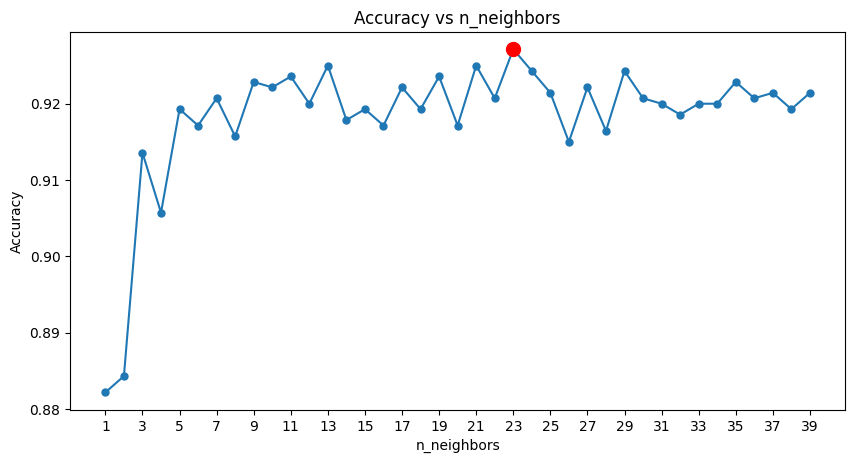

In [33]:
plt.figure(figsize=(10, 5))
plt.rcParams['figure.dpi'] = 100
plt.plot(param_grid['n_neighbors'], grid.cv_results_['mean_test_score'], marker='o', markersize=5)
plt.xticks(param_grid['n_neighbors'][::2])
plt.plot(grid.best_params_['n_neighbors'], grid.best_score_, marker='o', markersize=10, color='red')
plt.title('Accuracy vs n_neighbors')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [34]:
knn = KNeighborsClassifier(n_neighbors=grid.best_estimator_.n_neighbors)
knn.fit(X_train_not_scaled, Y_train)

print('Accuracy of KNN on training set: ', knn.score(X_train_not_scaled, Y_train))
print('Accuracy of KNN on test set: ', knn.score(X_test_not_scaled, Y_test))

final_accuracies_train['KNN'] = grid.score(X_train_not_scaled, Y_train)
final_accuracies_test['KNN'] = grid.score(X_test_not_scaled, Y_test)

Accuracy of KNN on training set:  0.9428571428571428
Accuracy of KNN on test set:  0.93


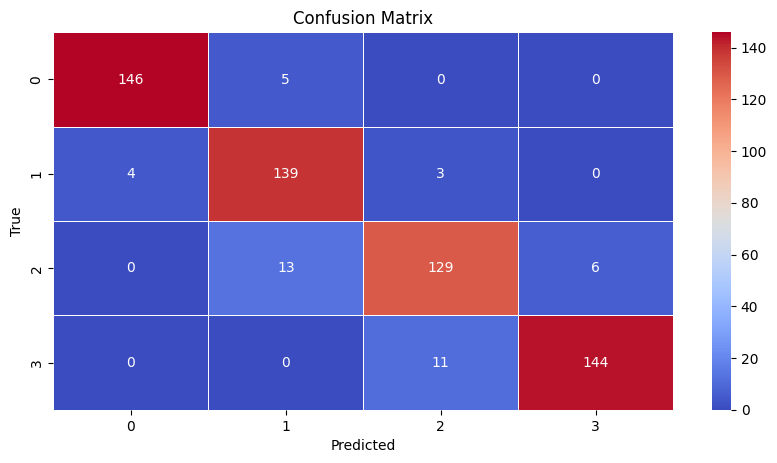

In [35]:
conf = confusion_matrix(Y_test, knn.predict(X_test_not_scaled))
plt.figure(figsize=(10, 5))
plt.rcParams['figure.dpi'] = 100
sns.heatmap(conf, annot=True, fmt='d', cmap="coolwarm", linewidths=.5)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Extra: Linear regression only RAM vs Price

In [36]:
X = train_pd['ram']
Y = train_pd['price_range']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

In [37]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

print('Accuracy of Linear Regression on training set: ', lr.score(X_train, Y_train))
print('Accuracy of Linear Regression on test set: ', lr.score(X_test, Y_test))

final_accuracies_train['Linear Regression only RAM'] = lr.score(X_train, Y_train)
final_accuracies_test['Linear Regression only RAM'] = lr.score(X_test, Y_test)

Accuracy of Linear Regression on training set:  0.8334229770777327
Accuracy of Linear Regression on test set:  0.8573473007607767


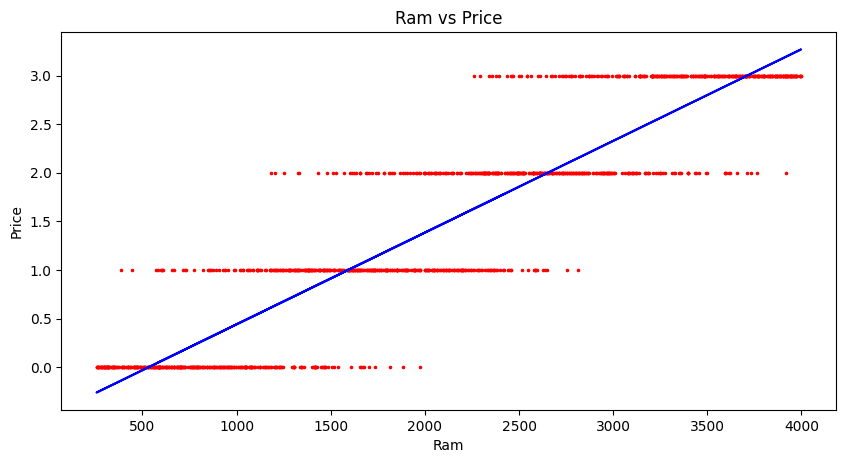

In [38]:
plt.figure(figsize=(10, 5))
plt.rcParams['figure.dpi'] = 100
plt.scatter(X_train, Y_train, color='red', marker='.', s=10)
plt.plot(X_train, lr.predict(X_train), color='blue')
plt.title('Ram vs Price')
plt.xlabel('Ram')
plt.ylabel('Price')
plt.show()

## Final results

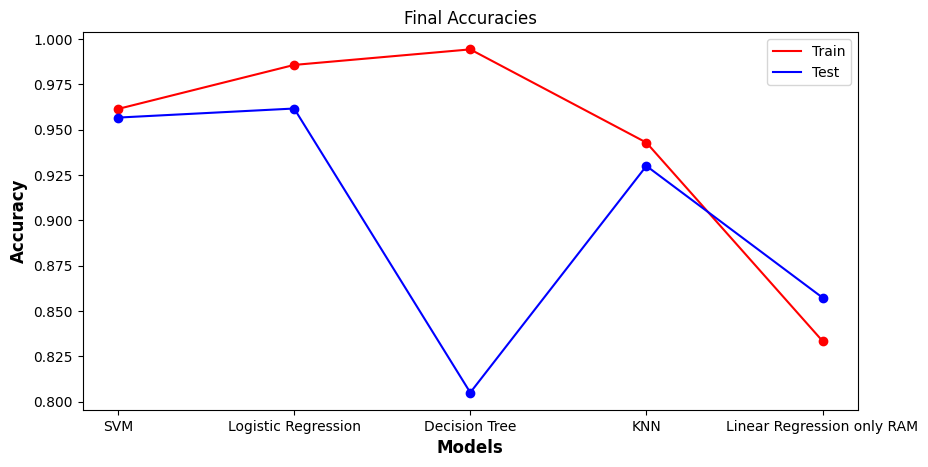

In [39]:
plt.figure(figsize=(10, 5))
plt.rcParams['figure.dpi'] = 100
plt.plot(final_accuracies_train.keys(), final_accuracies_train.values(), color='red', label='Train')
plt.scatter(final_accuracies_train.keys(), final_accuracies_train.values(), color='red')
plt.plot(final_accuracies_test.keys(), final_accuracies_test.values(), color='blue', label='Test')
plt.scatter(final_accuracies_test.keys(), final_accuracies_test.values(), color='blue')
plt.title('Final Accuracies')
plt.xlabel('Models', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy', fontsize=12, fontweight='bold')
plt.legend()
plt.show()

##  Conclusions:
The best model was definitely **Logistic regression**, with 96.16% of accuracy in the test data.

It is also interesting to notice Linear Regression only using RAM as a feature actually got a better result than the Decision Tree model.

KNN and SVM performed well, SVM almost as good as Logistic Regression, we could in some way say SVM reduced in a better way the overfit.